In [2]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
# See data/REAMD.md for longer names/details.
columns = ['x', 'y', 'z', 'label']
labels = ['Computer', 'Moving', 'Standing', 'Walking', 'Stairs',
          'Walking + talking', 'Standing + talking']
labels_map = {
    1: 'Computer',
    2: 'Moving',
    3: 'Standing',
    4: 'Walking',
    5: 'Stairs',
    6: 'Walking + talking',
    7: 'Standing + talking'
}

# usecols is used to skip reading the 'id' column, which has errors
ad = pd.read_csv('data/1.csv', sep=',', header=None, names=columns,
                 usecols=[1,2,3,4])

# TODO: put some reasonable values here
#x_min_max = (1455, 2356)
#y_min_max = (1697, 2713)
#z_min_max = (1644, 2739)

for column in columns:
    if column == 'label':
        # drop row with not a valid label
        ad = ad.loc[(1 <= ad['label']) & (ad['label'] <= 7), :]
        print(ad[column].value_counts())
    if column == 'x':
        # TODO detect anomalies
        #print(ad[column].sort_values().tail(40))
        print(column, 'min max:', ad[column].min(), ad[column].max())
    if column == 'y':
        print(column, 'min max:', ad[column].min(), ad[column].max())
    if column == 'z':
        print(column, 'min max:', ad[column].min(), ad[column].max())

ad['label'] = ad['label'].map(labels_map)

accs = ['x', 'y', 'z']

label_color = {
    'Computer': 'red',
    'Moving': 'green',
    'Standing': 'blue',
    'Walking': 'yellow',
    'Stairs': 'cyan',
    'Walking + talking': 'orange',
    'Standing + talking': 'purple' ,
}

# add a color to each class (label)
ad['color'] = ad['label'].map(label_color)

x min max: 1455 2356
y min max: 1697 2713
z min max: 1644 2739
7    83748
1    33677
4    26860
3    11179
5     3191
6     2917
2      928
Name: label, dtype: int64


In [ ]:
# The goal of the modeling is to see if it is possible to classify an unknown
# activity (one or a set of data points). This is classification, so possible
# models are knn, decision tree.


In [4]:
X = ad.loc[:, ['x', 'y', 'z']]
y = ad.loc[:, 'label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
# KNN
neighbours = 3
clf = KNeighborsClassifier(n_neighbors=neighbours)
fit = clf.fit(X_train, y_train)
y_pred = fit.predict(X_test)
confusion_matrix(y_test, y_pred)

In [16]:
# Decision tree

clf = DecisionTreeClassifier(
    max_depth=7,
    min_samples_split=10

)
fit = clf.fit(X_train, y_train)
y_pred = fit.predict(X_test)
confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))


/home/samuelsen/.local/share/virtualenvs/Assignment2-QHtghdoQ/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

          Computer       0.95      0.96      0.96      8325
            Moving       0.00      0.00      0.00       252
            Stairs       0.60      0.22      0.33       794
          Standing       0.49      0.22      0.31      2777
Standing + talking       0.85      0.95      0.89     21109
           Walking       0.75      0.80      0.77      6638
 Walking + talking       0.30      0.01      0.02       730

          accuracy                           0.84     40625
         macro avg       0.56      0.45      0.47     40625
      weighted avg       0.81      0.84      0.82     40625



In [8]:
from sklearn import tree


with open('activity.dot', 'w') as f:
    f = tree.export_graphviz(clf, out_file=f, feature_names=['x', 'y', 'z'], class_names=labels,
                             filled=True, rounded=True, special_characters=True)


[Text(167.4, 199.32, 'X[0] <= 1947.5\ngini = 0.66\nsamples = 121875\nvalue = [25352, 676, 2397, 8402, 62639, 20222, 2187]'),
 Text(83.7, 163.07999999999998, 'X[1] <= 2359.5\ngini = 0.524\nsamples = 93830\nvalue = [1053, 644, 1793, 8270, 61352, 18708, 2010]'),
 Text(41.85, 126.83999999999999, 'X[2] <= 2078.5\ngini = 0.451\nsamples = 12465\nvalue = [342, 210, 887, 348, 761, 9106, 811]'),
 Text(20.925, 90.6, 'X[1] <= 2347.5\ngini = 0.368\nsamples = 10130\nvalue = [117, 117, 333, 275, 572, 7985, 731]'),
 Text(10.4625, 54.359999999999985, 'X[0] <= 1726.5\ngini = 0.309\nsamples = 8742\nvalue = [101, 92, 286, 200, 199, 7226, 638]'),
 Text(5.23125, 18.119999999999976, 'gini = 0.0\nsamples = 69\nvalue = [69, 0, 0, 0, 0, 0, 0]'),
 Text(15.693750000000001, 18.119999999999976, 'gini = 0.298\nsamples = 8673\nvalue = [32, 92, 286, 200, 199, 7226, 638]'),
 Text(31.387500000000003, 54.359999999999985, 'X[1] <= 2354.5\ngini = 0.62\nsamples = 1388\nvalue = [16, 25, 47, 75, 373, 759, 93]'),
 Text(26.1562

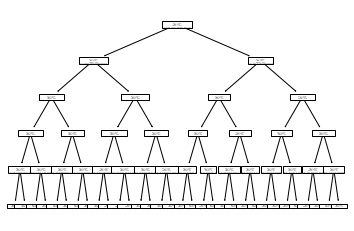